In [1]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

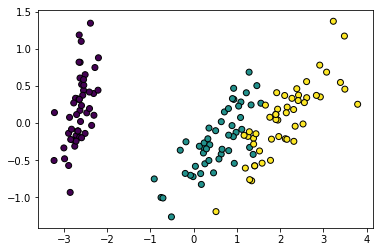

In [2]:
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## a) 
Let $$P(X \space | \space \mu,\Sigma) = \frac {1}{2 \pi |\Sigma|^{1/2}} * \exp[-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)]$$ be the bivariate Gaussian Distribution case, <br>
where $x, \mu \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2 \times 2}$

In [3]:
#Extraction of every class
c1,c2 = 1, 2
class1 = np.empty((0,2))
class2 = np.empty((0,2))
for i in range(len(X)):    
    if y[i] == c1:
        class1 = np.vstack((class1, X[i]))
    elif y[i] == c2:
        class2 = np.vstack((class2, X[i]))
print(class1.shape)
print(class2.shape)

(50, 2)
(50, 2)


### Mean for class 1:
$$\mu_1 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(1)}_{i}}$$ where $C^{(1)}$ refers to class 1 vector

In [10]:
mu_1 = np.mean(class1, axis=0, keepdims=True)
print(mu_1)

[[ 0.53199262 -0.24402963]]


### Mean for class 2:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [5]:
mu_2 = np.mean(class2, axis=0, keepdims=True)
print(mu_2)

[[2.10884814 0.05350968]]


### Covariance Matrix:
$$\Sigma = \frac{1}{n}[\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T}+\sum_{j=1}^{n_2}{(C_i^{(2)}-\mu_2)(C_i^{(2)}-\mu_2)^T}]$$ where $n = n_1 + n_2$ and $n_1=n_2$, then $$\Sigma = \frac{1}{2} [\frac{1}{n_1}\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T}+\frac{1}{n_2}\sum_{j=1}^{n_2}{(C_i^{(2)}-\mu_2)(C_i^{(2)}-\mu_2)^T}] = \frac{1}{2}(\Sigma_1 + \Sigma_2)$$

In [19]:
cov_matrix = (1.0/2)*(np.cov(class1,rowvar=False)+np.cov(class2,rowvar=False))
print(cov_matrix)

[[0.42752983 0.23683837]
 [0.23683837 0.20839321]]


## b)

The discriminant function can be seen as
$g_i(x) = P(C_i|x) = P(x|C_i)P(C_i)$ $_{(i=1,2)}$, where $x \in \mathbb{R}^2$, then
$$P(x | C_i) = \log (\frac {1}{2 \pi |\Sigma|^{1/2}}) + \log (\exp[-\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)]) = -\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)$$ since $\log (\frac {1}{2 \pi |\Sigma|^{1/2}})$ is a constant because $\Sigma$ is equal for all classes. <br>
There are two classes with the same number of observations, so the prior $P(C_i)$ can also be dropped.

In [7]:
def g_1(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_1), np.linalg.inv(cov_matrix)), (x-mu_1).T)

def g_2(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_2), np.linalg.inv(cov_matrix)), (x-mu_2).T)

def chooseClass(X):
    return np.array([0 if g_1(x) >= g_2(x) else 1 for x in X])

## c)

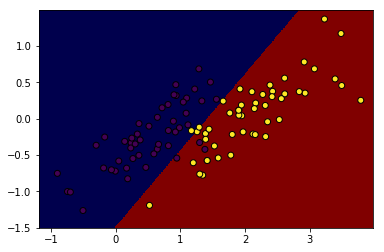

In [8]:
import warnings
import matplotlib
warnings.filterwarnings("ignore")

matplotlib.use('agg')
import pylab as pl

x_min = -1.2; x_max = 4.0
y_min = -1.5; y_max = 1.5

h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = chooseClass(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[50:, 0], X[50:, 1], marker='o', c=y[50:], edgecolor='k')

## d)

## 2)

## a) 
Let $$P(X \space | \space \mu,\Sigma) = \frac {1}{2 \pi |\Sigma|^{1/2}} * \exp[-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)]$$ be the bivariate Gaussian Distribution case, <br>
where $x, \mu \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2 \times 2}$

In [17]:
#Extraction of every class
c1, c2 = 1, 2
class1, class2, class3 = np.empty((0,2)), np.empty((0,2)), np.empty((0,2))
for i in range(len(X)):    
    if y[i] == c1:
        class1 = np.vstack((class1, X[i]))
    elif y[i] == c2:
        class2 = np.vstack((class2, X[i]))
    else:
        class3 = np.vstack((class3, X[i]))
print(class1.shape)
print(class2.shape)
print(class3.shape)

(50, 2)
(50, 2)
(50, 2)


### Mean for class 1:
$$\mu_1 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(1)}_{i}}$$ where $C^{(1)}$ refers to class 1 vector

In [ ]:
mu_1 = np.mean(class1, axis=0, keepdims=True)
print(mu_1)

### Mean for class 2:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [15]:
mu_2 = np.mean(class2, axis=0, keepdims=True)
print(mu_2)

[[2.10884814 0.05350968]]


### Mean for class 3:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [16]:
mu_3 = np.mean(class3, axis=0, keepdims=True)
print(mu_3)

[[-2.64084076  0.19051995]]


### Covariance Matrix:
$$\Sigma = \frac{1}{n}[\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T}+\sum_{j=1}^{n_2}{(C_i^{(2)}-\mu_2)(C_i^{(2)}-\mu_2)^T}]$$ where $n = n_1 + n_2$ and $n_1=n_2$, then $$\Sigma = \frac{1}{2} [\frac{1}{n_1}\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T}+\frac{1}{n_2}\sum_{j=1}^{n_2}{(C_i^{(2)}-\mu_2)(C_i^{(2)}-\mu_2)^T}] = \frac{1}{2}(\Sigma_1 + \Sigma_2)$$

In [20]:
cov_matrix = (1.0/2)*(np.cov(class1,rowvar=False)+np.cov(class2,rowvar=False))
print(cov_matrix)

[[0.42752983 0.23683837]
 [0.23683837 0.20839321]]
